In [3]:
import sys
sys.path.append("../..")
import numpy as np
import random
import matplotlib.pyplot as plt

from config import client

In [4]:
osu_db = client.osu_random_db

In [5]:
def sample_function(rank_score):
    return 4.2 * np.exp(-5.941878135093015 + 0.0006782525709886764 * rank_score)

In [6]:
all_users_rank_score = list(osu_db.osu_user_stats.find({},{'rank_score': 1}))

In [7]:
def should_sample_user(rank_score):
    return random.random() < sample_function(rank_score)

In [8]:
def sample_users():
    random.shuffle(all_users_rank_score)

    sampled_user_ids = []
    for u in all_users_rank_score:
        if (should_sample_user(u['rank_score'])):
            sampled_user_ids.append(u['_id'])
    
    return sampled_user_ids

In [9]:
avg_number_users_sampled = np.mean([len(sample_users()) for _ in range(50)])

In [10]:
sampled_user_ids = sample_users()

In [11]:
sampled_scores_est_pp = list(
    osu_db.osu_scores_high.find({
        'user_id': {
            '$in': sampled_user_ids
        }
    }, {'mlpp.est_user_pp': 1})
)

In [12]:
sampled_est_pp = [s['mlpp']['est_user_pp'] for s in sampled_scores_est_pp]

In [13]:
len(sampled_est_pp)

1545265

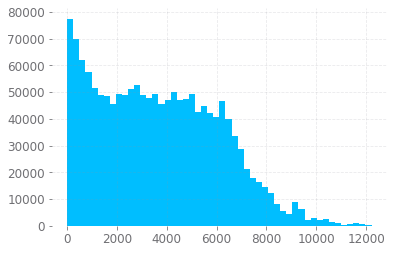

In [14]:
_ = plt.hist(sampled_est_pp, bins=50)